# Super_Market_Sales_Analysis


In [1]:
# Import required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Explore the  dataset

In [2]:
# Load the dataset
df = pd.read_csv("D:/Data Analysis/supermarket_sales .csv")

In [3]:
# Display part of the data 
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Check for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
#Calculate summary statistics for the data set  
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [6]:
# Check number of rows and columns 
df.shape

(1000, 17)

## Cleaning and organizing dataset

In [7]:
# Replacing spaces with underscores and making the headers lowercase
sales_data = df.copy() 
sales_data.columns = df.columns.str.replace(' ', '_').str.lower()

In [8]:
# Change date to the correct data type
sales_data ['date'] = pd.to_datetime(sales_data['date'])

In [9]:
# Delete unneccessary columns
del_column = sales_data.drop(columns = ['gross_margin_percentage', 'gross_income'], inplace = True)
sales_data.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'cogs', 'rating'],
      dtype='object')

In [10]:
#Rename the column
re_column = sales_data.rename(columns = {'cogs': 'gross_income'}, inplace = True)

In [11]:
#Round off  multiple columns the dataset
sales_data = sales_data.apply(lambda x : x.round(2) if x.dtype.kind in 'f' else x )


In [12]:
sales_data.head(3)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23,Credit card,324.31,7.4


In [13]:
# Check the data types to ensure accuracy
sales_data.dtypes

invoice_id               object
branch                   object
city                     object
customer_type            object
gender                   object
product_line             object
unit_price              float64
quantity                  int64
tax_5%                  float64
total                   float64
date             datetime64[ns]
time                     object
payment                  object
gross_income            float64
rating                  float64
dtype: object

## General Data Exploration


 ### 1.What is the average, median,standard deviation, and variance of Unit price and Quantity for each Product line?

In [14]:
#Finding summary statistics for the data and rounding it off

sales_data_stats = round(sales_data.groupby('product_line')[['unit_price','quantity']].agg(['mean', 'median', 'std', 'var']),2)
sales_data_stats

unit_price                       quantity               \
                             mean median    std     var     mean median   std   
product_line                                                                    
Electronic accessories      53.55  51.50  26.75  715.46     5.71    6.0  2.91   
Fashion accessories         57.15  55.09  26.67  711.09     5.07    5.0  3.10   
Food and beverages          56.01  54.00  26.27  690.13     5.47    5.0  2.87   
Health and beauty           54.85  57.40  26.35  694.48     5.62    6.0  2.85   
Home and lifestyle          55.32  55.59  26.21  686.80     5.69    6.0  2.82   
Sports and travel           56.99  58.65  26.91  723.88     5.54    6.0  2.95   

                              
                         var  
product_line                  
Electronic accessories  8.47  
Fashion accessories     9.62  
Food and beverages      8.25  
Health and beauty       8.11  
Home and lifestyle      7.96  
Sports and travel       8.71

### 2.How many unique Customer types are there? What is the distribution of Customer type by Branch?

In [15]:
# Counting number of customers by their category

customer_data = sales_data['customer_type'].value_counts()
customer_data

customer_type
Member    501
Normal    499
Name: count, dtype: int64

### Answer :
- **Two, member and normal**

In [16]:
# Number of customers category by branch

customer_by_branch = sales_data.groupby('branch')['customer_type'].value_counts()
customer_by_branch

branch  customer_type
A       Normal           173
        Member           167
B       Normal           167
        Member           165
C       Member           169
        Normal           159
Name: count, dtype: int64

### Answer :
- **Branch A:**
member 167,
normal 173
- **Branch B**
member 165,
normal 167
- **Branch C:**
member 169,
normal 159

### 3. Which Branch generated the highest gross income, and how does it compare to the others?

In [17]:
highest_gross_income_branch = sales_data.pivot_table(values="gross_income", index="branch", aggfunc="sum")
highest_gross_income_branch 

,gross_income
branch,
A,101143.21
B,101140.64
C,105303.53


### Answer :
- **Branch C** .The difference is small, about 4162

### 4.	What are the most popular payment methods across different cities?


In [18]:
payment_methods = sales_data.pivot_table(values="unit_price", index="city", columns="payment", aggfunc="count" ) 
payment_methods


payment,Cash,Credit card,Ewallet
city,,,
Mandalay,110,109,113
Naypyitaw,124,98,106
Yangon,110,104,126


### Answer :
- Mandalay popular payment method:
  - Ewallet 113
- Naypyitaw popular payment methods:
  - Cash 124 
 - Yangon popular payment methods:
   - Ewallet  126

## Filtering and Aggregation





### 5.	What is the total sales (gross_income) generated per Product line in each city?

In [19]:
total_sales = sales_data.pivot_table(values="gross_income", index="product_line", columns= "city", aggfunc="sum")
total_sales

city,Mandalay,Naypyitaw,Yangon
product_line,,,
Electronic accessories,16239.47,18065.69,17444.87
Fashion accessories,15631.73,20533.40,15554.77
Food and beverages,14490.37,22635.10,16345.81
Health and beauty,19029.20,15824.12,11997.86
Home and lifestyle,16713.49,13233.86,21349.71
Sports and travel,19036.38,15011.36,18450.19


### 6.	Filter transactions where the Rating is below 5. What percentage of these belong to each Branch?

In [20]:
rating_below_5_by_percentage = round(sales_data[sales_data["rating"]> 5]["branch"].value_counts(normalize = True) * 100, 2)
rating_below_5_by_percentage

branch
A    33.9
C    33.9
B    32.2
Name: proportion, dtype: float64

### Answer :
- **A and C 33.9%**
- **B 32.2%** 


### 7.	Calculate the top 3 days with the highest total sales (gross_income) in the dataset.

In [21]:
top_3_sales = sales_data.groupby("date")["gross_income"].sum().nlargest(3)
top_3_sales

date
2019-03-09    7118.14
2019-02-07    6884.01
2019-03-14    6871.08
Name: gross_income, dtype: float64

### Answer:

1. 2019-03-09
 - **7118.14**
2. 2019-02-07
 - **6884.01**
3.  2019-03-14
 - **6871.08**

In [22]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   invoice_id     1000 non-null   object        
 1   branch         1000 non-null   object        
 2   city           1000 non-null   object        
 3   customer_type  1000 non-null   object        
 4   gender         1000 non-null   object        
 5   product_line   1000 non-null   object        
 6   unit_price     1000 non-null   float64       
 7   quantity       1000 non-null   int64         
 8   tax_5%         1000 non-null   float64       
 9   total          1000 non-null   float64       
 10  date           1000 non-null   datetime64[ns]
 11  time           1000 non-null   object        
 12  payment        1000 non-null   object        
 13  gross_income   1000 non-null   float64       
 14  rating         1000 non-null   float64       
dtypes: datetime64[ns](1), 

## Visualization of the data





### 8.	Create a time-series plot of total sales (Total) over time for each Branch. Identify any noticeable trends or outliers.

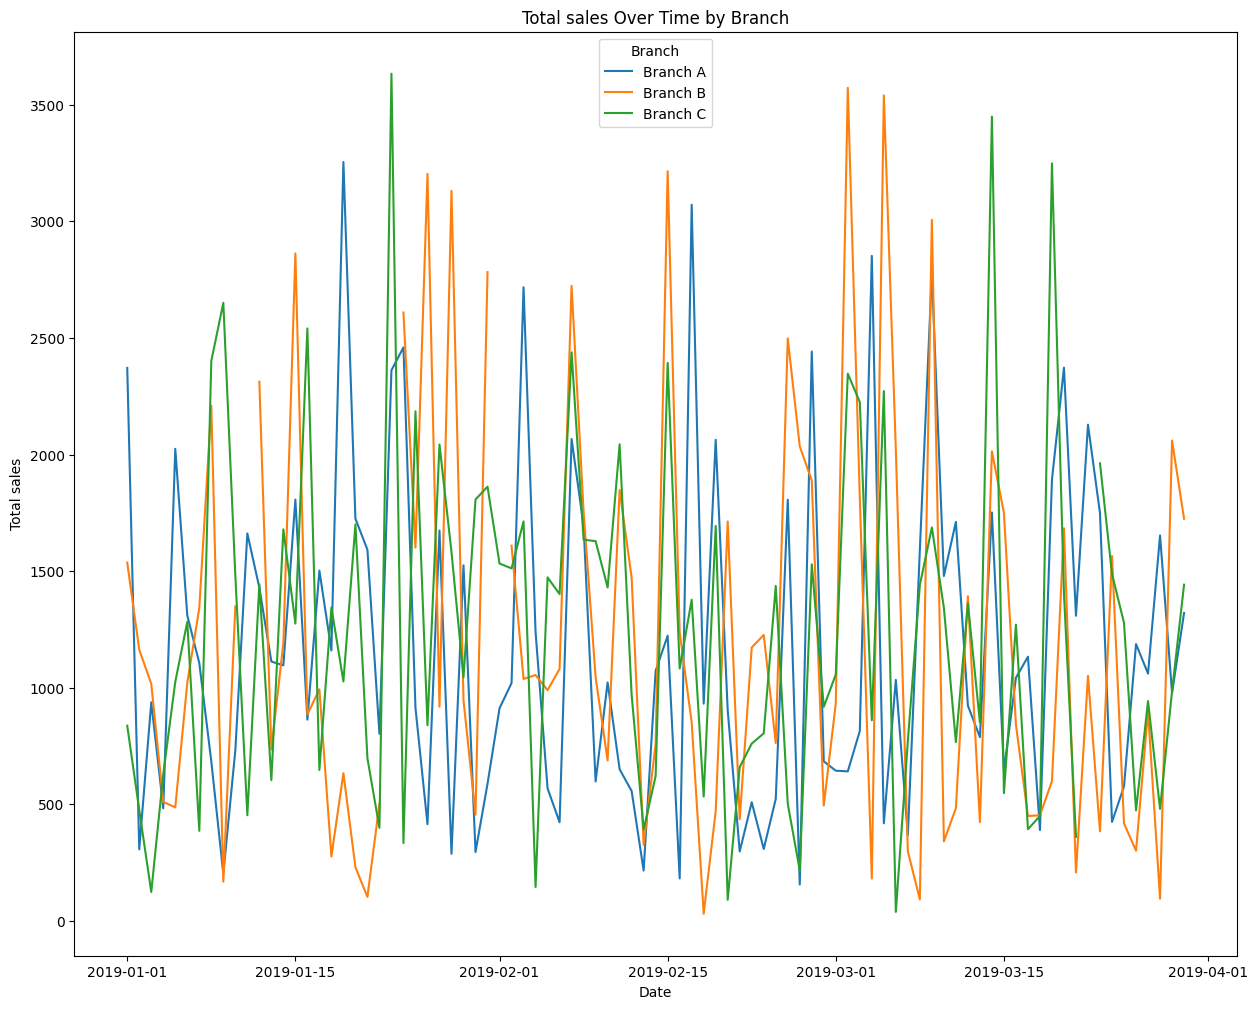

In [23]:
# Subset data for plotting 

time_s_data =sales_data.pivot_table(values="total", index="date", columns="branch", aggfunc="sum")

plt.figure(figsize=[15,12])
plt.plot(time_s_data)

# Add a legend and labels
plt.legend(["Branch A", "Branch B", "Branch C"], title="Branch", loc="upper center")
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.title('Total sales Over Time by Branch')
plt.show()

### Answer:
- **Each branch has some noticeable outliers**

### 9.	Create a boxplot of Rating for each Product line. Are there any significant differences?

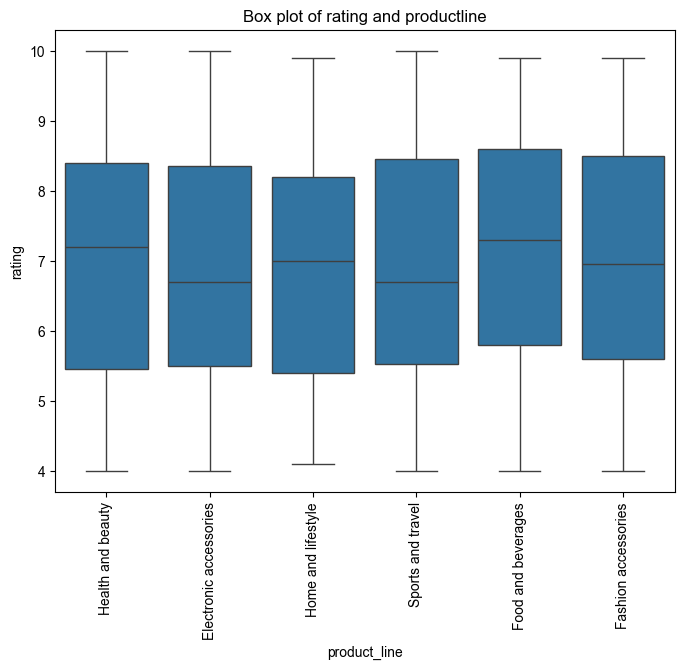

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='product_line', y='rating', data=sales_data, )
plt.xticks(rotation=90, fontsize=10)
sns.set(style="whitegrid")
plt.title("Box plot of rating and productline")
plt.show()
    

### Answer:
- **No there are no outliers**

### 10.	Plot the average Tax 5% collected per Product line for each city. Which city collects the highest average tax per product line?

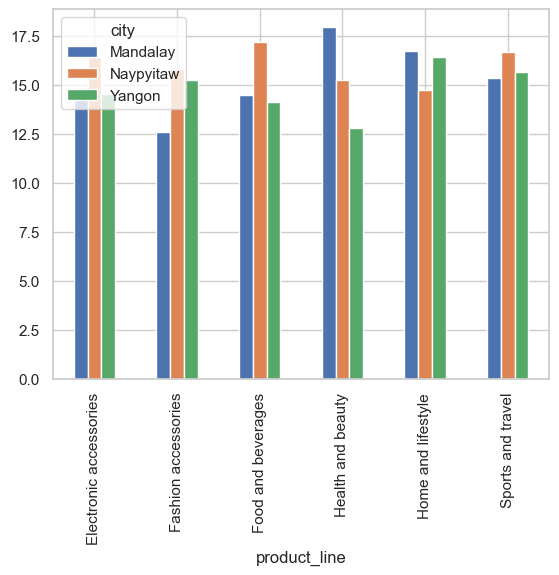

In [25]:
average_tax_city = sales_data.pivot_table(values="tax_5%", index= "product_line", columns="city", aggfunc="mean")
average_tax_city.plot(kind="bar")
plt.show()

### Answer:
- **Mandalay city**

### 11. Analyze if there's any relationship between gross income and Rating. Is there a positive, negative, or no correlation?

### Answer: 
- **There is no correlation**

In [26]:
sales_data[['gross_income','rating']].corr()

,gross_income,rating
gross_income,1.000000,-0.036442
rating,-0.036442,1.000000


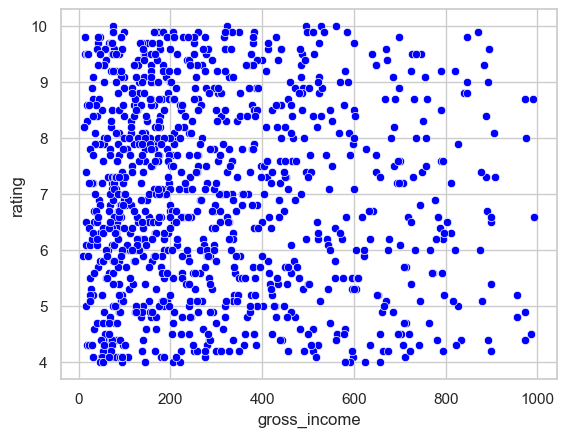

<Figure size 1000x800 with 0 Axes>

In [27]:
sns.scatterplot(x= "gross_income", y ="rating" , data=sales_data, color="blue")
plt.figure(figsize=(10, 8))
plt.show()


### 12.	Find the average gross income per Customer type for each Branch. Does any branch cater more effectively to a particular customer type?

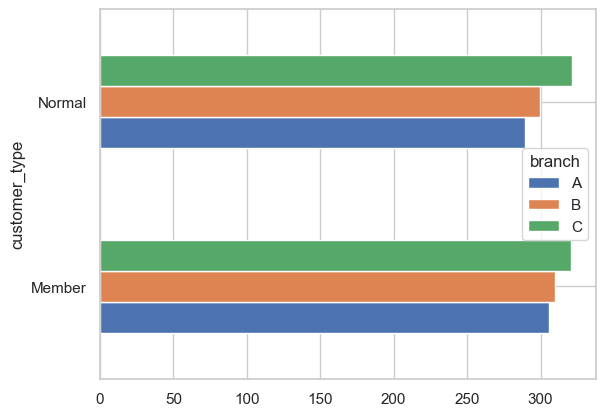

In [28]:
gross_customer_branch = sales_data.pivot_table(values = "gross_income", index= "customer_type", columns= "branch", aggfunc = "mean")
gross_customer_branch.plot(kind="barh")
plt.show()

### Answer:
- **No**